In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_excel("C:\\Users\\user\\Desktop\\machine\\data_1017.xlsx",sheet_name="Sheet1")
label_encoder = LabelEncoder()

# 'fixed_type'을 숫자형으로 변환
df['fixed_type_encoded'] = label_encoder.fit_transform(df['fixed_type'])

print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
df = df.drop(['fixed_type','ht_omr_data','FG'], axis=1)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'D1': 4, 'D2': 5, 'E': 6, 'M': 7, 'M1': 8, 'M2': 9, 'Ma': 10, 'Mb': 11, 'Mc': 12, 'R': 13, 'X': 14}


In [44]:
# def split_omr_data(df):
#     # 'ht_omr_data' 열의 값을 리스트로 변환 (한 글자씩)
#     omr_responses = df['ht_omr_data'].apply(lambda x: list(x[:375]))  # 480개의 문항까지만 자름
#     # 리스트를 각각의 문항으로 나누어 새로운 컬럼으로 변환
#     omr_df = pd.DataFrame(omr_responses.tolist(), columns=[f'Q{i+1}' for i in range(375)])
#     # 원래 df와 결합
#     df = pd.concat([df, omr_df], axis=1)
#     return df

# # 데이터 분리 실행
# df_split = split_omr_data(df)

# # 결과 확인
# df = df_split


In [2]:
df

,sex,sc_code,age,t1,t2,t3,t4,t5,t6,t7,...,t19,t20,t21,t22,t23,t24,t25,t26,t27,fixed_type_encoded
0,1,3,32,48,55,57,54,46,59,60,...,44,62,37,49,53,51,46,39,61,0
1,1,1,39,61,56,61,60,50,57,55,...,42,41,30,39,43,54,44,57,41,2
2,1,4,39,46,36,51,52,46,52,49,...,43,55,47,44,44,48,45,43,65,7
3,2,3,34,46,54,46,61,48,59,52,...,44,41,36,46,44,40,46,41,57,7
4,1,2,34,37,39,46,50,44,57,64,...,42,45,46,42,43,42,44,41,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,1,3,39,44,51,51,56,58,57,49,...,43,41,41,44,51,53,45,58,53,0
30867,1,1,29,43,53,43,49,43,46,45,...,52,80,60,55,60,45,57,47,38,7
30868,2,1,38,45,35,53,42,44,45,54,...,51,47,64,52,43,41,43,40,39,0
30869,2,1,18,43,51,50,44,51,52,49,...,45,41,40,50,42,50,46,42,45,0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
X = df.iloc[:,:-1]

y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000, stratify=y)

In [5]:
dtrain = xgb.DMatrix(data = x_train, label = y_train)
dtest = xgb.DMatrix(data = x_test, label = y_test)

In [6]:
params = {
    "max_depth": 4,  # 트리의 최대 깊이 증가
    "eta": 0.05,  # 학습률 감소
    "objective": "multi:softmax", 
    "eval_metric": "merror",
    "num_class": 15, 
    "subsample": 0.8,  # 데이터의 80%만 사용
    "colsample_bytree": 0.8,  # 각 트리에서 사용할 피처의 비율
    "gamma": 1  # 노드 분할 최소 손실 감소
}

num_rounds = 1500  # 부스팅 반복 횟수 증가

# evals 파라미터에 train, test 셋을 명기하면 평가를 진행하면서 조기 중단을 적용 할 수 있다.
wlist = [(dtrain, "train"), (dtest, "eval")]
# xgb.cv(params=params, dtrain=dtrain, num_boost_round=500, nfold=5, 
#                     early_stopping_rounds=10, metrics="merror", as_pandas=True)


In [7]:
# 모델 학습
xgb_model = xgb.train(
    params=params, 
    dtrain=dtrain, 
    num_boost_round=num_rounds, 
    evals=wlist, 
    early_stopping_rounds=50  # 성능 향상이 없으면 50 라운드 후 조기 중단
)

# 최적 모델 저장
xgb_model.save_model('C:\\Users\\user\\Desktop\\best_xgb_model.json')  # 모델을 파일로 저장


[0]	train-merror:0.33763	eval-merror:0.34510
[1]	train-merror:0.26118	eval-merror:0.26300
[2]	train-merror:0.23299	eval-merror:0.23190
[3]	train-merror:0.21068	eval-merror:0.21619
[4]	train-merror:0.19339	eval-merror:0.20146
[5]	train-merror:0.19206	eval-merror:0.19773
[6]	train-merror:0.18574	eval-merror:0.19142
[7]	train-merror:0.18392	eval-merror:0.19142
[8]	train-merror:0.17675	eval-merror:0.18607
[9]	train-merror:0.17541	eval-merror:0.18397
[10]	train-merror:0.17477	eval-merror:0.18251
[11]	train-merror:0.17355	eval-merror:0.18235
[12]	train-merror:0.17310	eval-merror:0.18219
[13]	train-merror:0.17201	eval-merror:0.18121
[14]	train-merror:0.16958	eval-merror:0.17846
[15]	train-merror:0.16796	eval-merror:0.17781
[16]	train-merror:0.16784	eval-merror:0.17636
[17]	train-merror:0.16513	eval-merror:0.17619
[18]	train-merror:0.16306	eval-merror:0.17474
[19]	train-merror:0.16237	eval-merror:0.17263
[20]	train-merror:0.16189	eval-merror:0.17166
[21]	train-merror:0.15833	eval-merror:0.1676

In [8]:
loaded_model = xgb.Booster()
loaded_model.load_model('C:\\Users\\user\\Desktop\\best_xgb_model.json')

Accuracy: 0.9234


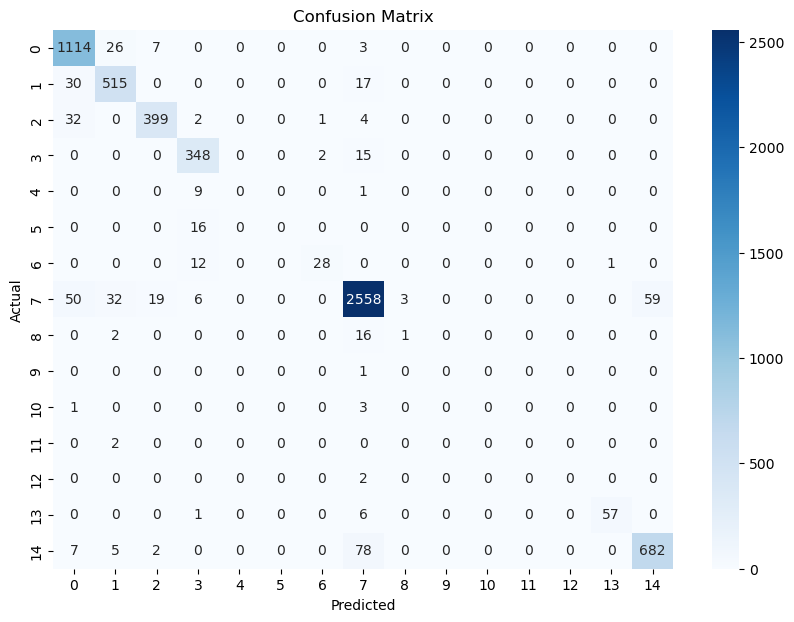

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1150
           1       0.88      0.92      0.90       562
           2       0.93      0.91      0.92       438
           3       0.88      0.95      0.92       365
           4       1.00      0.00      0.00        10
           5       1.00      0.00      0.00        16
           6       0.90      0.68      0.78        41
           7       0.95      0.94      0.94      2727
           8       0.25      0.05      0.09        19
           9       1.00      0.00      0.00         1
          10       1.00      0.00      0.00         4
          11       1.00      0.00      0.00         2
          12       1.00      0.00      0.00         2
          13       0.98      0.89      0.93        64
          14       0.92      0.88      0.90       774

    accuracy                           0.92      6175
   macro avg       0.91      0.48      0.49      6175
we

c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, roc_auc_score, f1_score, precision_score, recall_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 테스트 데이터에 대한 예측 (확률이 아닌 레이블을 반환)
y_pred = loaded_model.predict(dtest).astype(int)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report (Precision, Recall, F1-Score 포함)
class_report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", class_report)

# Balanced Accuracy (클래스 불균형 문제 해결을 위한 정확도)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score (weighted): {f1:.4f}")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision (weighted): {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall (weighted): {recall:.4f}")

# ROC-AUC는 다중 클래스 분류에서 각 클래스별로 계산
num_classes = 15  # 전체 클래스 수
y_test_onehot = np.eye(num_classes)[y_test]  # y_test에 대해 one-hot encoding
y_pred_onehot = np.eye(num_classes)[y_pred]  # y_pred에 대해 one-hot encoding

# ROC-AUC 계산 (One-vs-Rest 방식으로 다중 클래스에 대한 ROC-AUC 계산)
roc_auc = roc_auc_score(y_test_onehot, y_pred_onehot, multi_class='ovr', average='weighted')
print(f"ROC-AUC (weighted, OVR): {roc_auc:.4f}")

# Cohen's Kappa 계산
cohen_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohen_kappa:.4f}")

# Matthews Correlation Coefficient (MCC) 계산
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


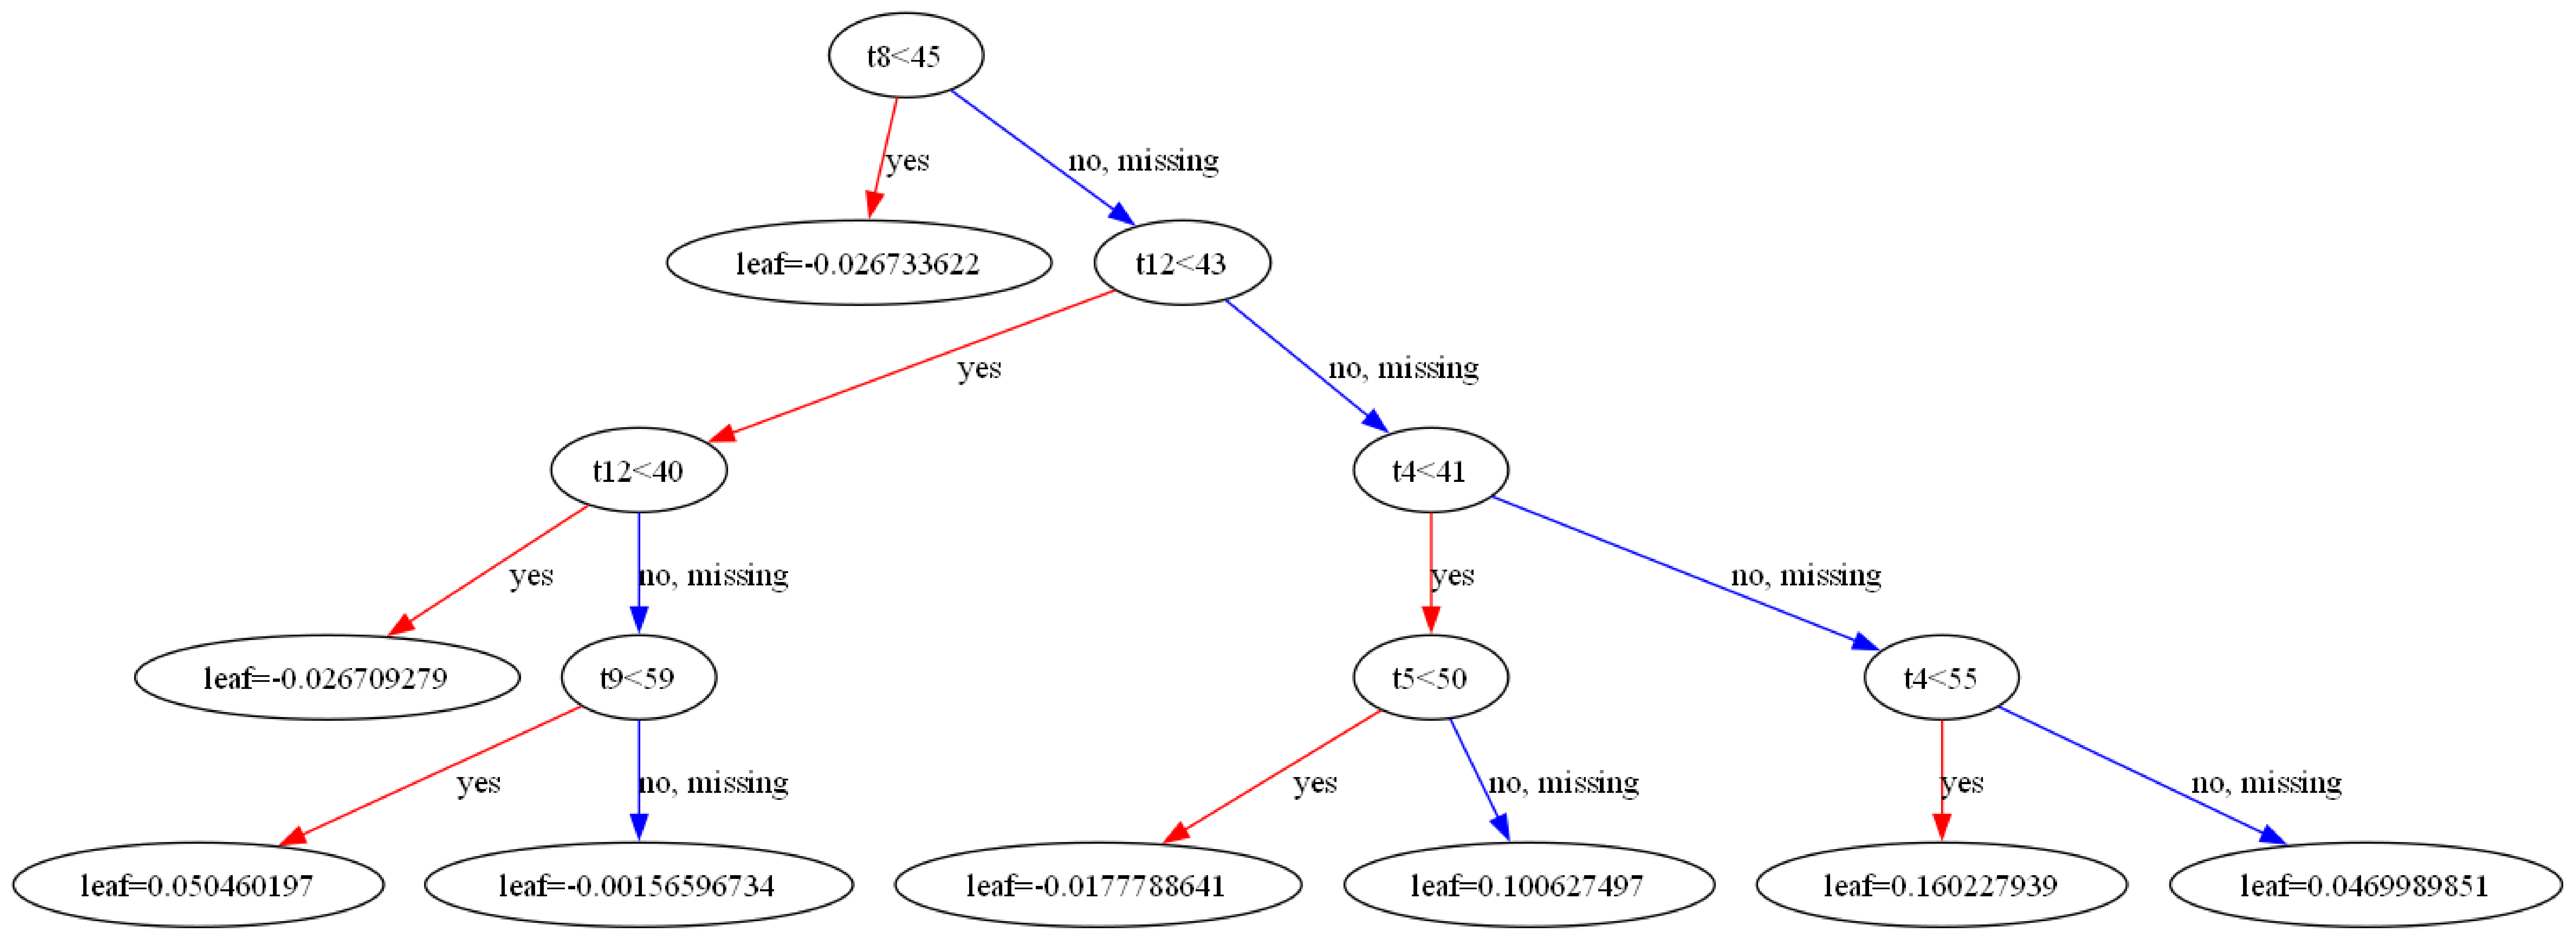

In [11]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

# 설정
rcParams['figure.figsize'] = 80,80
plot_tree(xgb_model)
plt.show()
